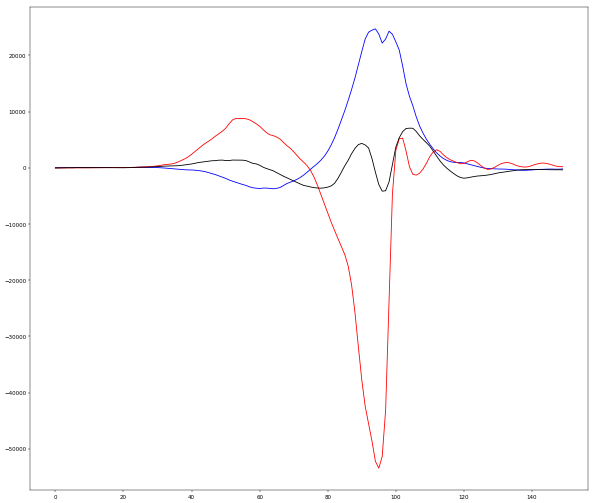

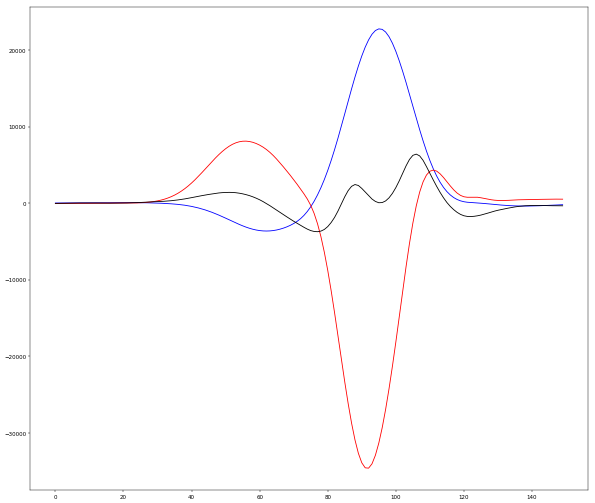

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from filtering import savitzky_golay

col_names = ['timestamp', 'X', 'Y', 'Z']
gyro_data_reference = pd.read_csv('./reference-fd-bw/gyro.csv', names=col_names)

TMP_START = 0
TMP_END = 150

xaxis = list(range(len(gyro_data_reference)))[TMP_START:TMP_END]
x_reference = gyro_data_reference['X'][TMP_START:TMP_END]
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = gyro_data_reference['Y'][TMP_START:TMP_END]
z_reference = gyro_data_reference['Z'][TMP_START:TMP_END]
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()

# reference data filtration
x_reference = savitzky_golay(list(x_reference), 21, 2)
x_reference = savitzky_golay(list(x_reference), 31, 2)
y_reference = savitzky_golay(list(y_reference), 21, 2)
y_reference = savitzky_golay(list(y_reference), 31, 2)
# z_reference = savitzky_golay(list(z_reference), 11, 2)
z_reference = savitzky_golay(list(z_reference), 21, 2)

fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()
plt.legend()



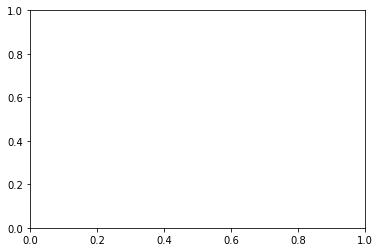

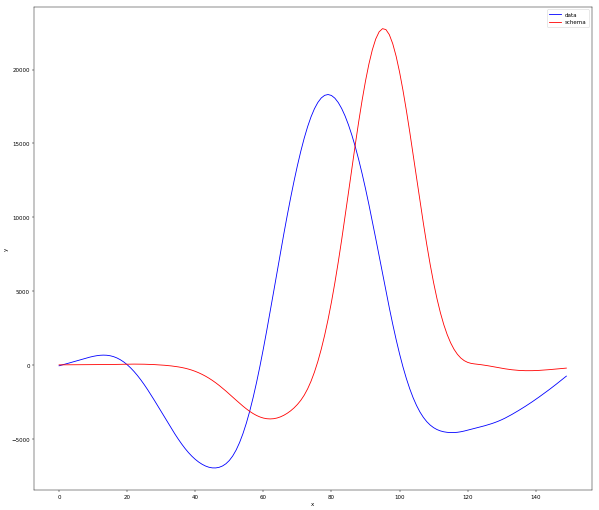

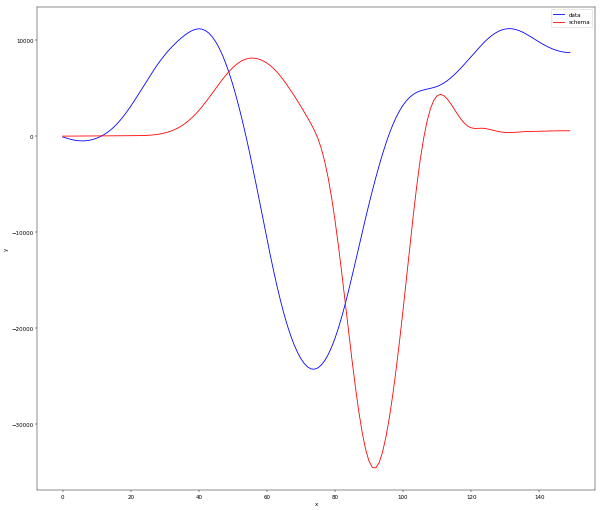

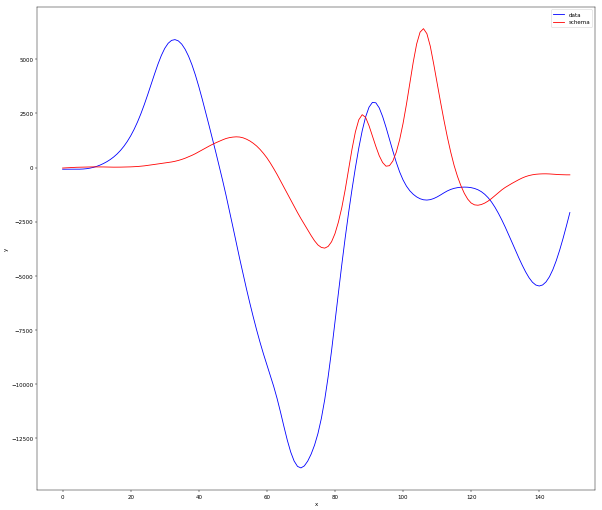

In [2]:

TMP_START = 0
TMP_END = 150

gyro_data_forward = pd.read_csv('./amg-forward/gyro.csv', names=col_names)
xaxis = list(range(len(gyro_data_forward)))[TMP_START:TMP_END]

x_normal = gyro_data_forward['X'][TMP_START:TMP_END]
y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]


# forward data normalization
x_normal = savitzky_golay(list(x_normal), 21, 2)
x_normal = savitzky_golay(list(x_normal), 51, 2)
y_normal = savitzky_golay(list(y_normal), 31, 2)
y_normal = savitzky_golay(list(y_normal), 51, 2)
z_normal = savitzky_golay(list(z_normal), 11, 2)
z_normal = savitzky_golay(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(y_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(z_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(z_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [5]:
%pylab inline
from dtw import dtw
# DTW for Z acc
x_normal = gyro_data_forward['X']
# y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
# z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]
x_normal = savitzky_golay(list(x_normal), 21, 2)
x_normal = savitzky_golay(list(x_normal), 51, 2)

k = x_normal[150:300]
n = x_reference

dtw_x_data = []
# this simple for loop calculates the similarities between reference model
# and given time-window (ie. from 100 to 250)
for it in range(3000):
    k = x_normal[it:it+150]
    dist, cost, *_ = dtw(k, n, dist=lambda k, n: norm(k - n))
    dtw_x_data.append(mean(cost))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


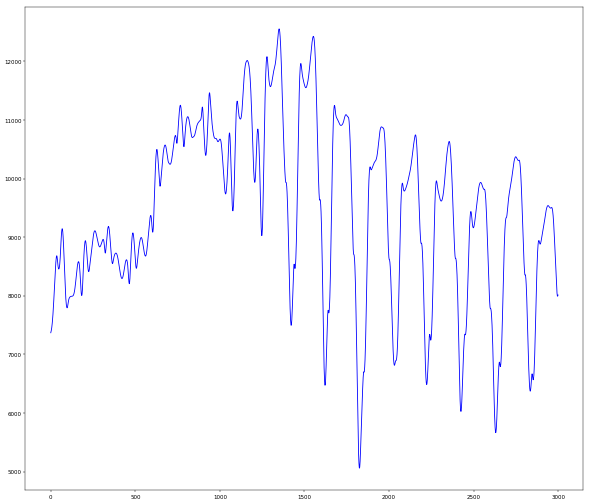

In [7]:
# Plot showing where local minimums are (these are the indexes we are
# searching for). Roughly every 150 indexes there should occur next minimum.
xaxis = list(range(len(dtw_x_data)))
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(dtw_x_data), color="blue", label="data")


In [26]:
minima_indexes = []
step = 140
for it in range(0, len(dtw_x_data), step):
    val = min(dtw_x_data[it:it+step])
    minima_indexes.append(dtw_x_data.index(val))
    
    
print(minima_indexes)


[0, 183, 419, 464, 560, 705, 916, 1077, 1248, 1399, 1421, 1622, 1819, 1825, 2032, 2222, 2246, 2425, 2631, 2660, 2835, 2996]
